<a href="https://colab.research.google.com/github/paingolani/Collabs/blob/main/TP_N%C2%BA_4_GrupoNombreTramite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo de 1-3 -> 2 (diabetes)

Grupo  de 4-6-> 3 (Diabetes)

Grupo  de 4-6-> 4 (Diabetes)

**Trabajo Practico Nº 4**
Analisis sobre data set

1= Buscar los siguiente data set en la web
* Titanic
* Iris
* Wine
* Indian Diabetes

2- Explicar cada data set , sus diferente Variables\
3- Deside justificando tu respuesta que tipo de categoria de variable son\
4- Detectar y arreglar los siguientes coceptos
* Valores Ausente
* Valores Atipicos

5- De los difentes data set , se puede eliminar alguna columna\

6- Realizar analisis univariados
* Grafico de frecuencia
* Grafico de torta
* Histograma
* etc

7- En base a los graficos del punto 6 realizar distintas concluciones\

8- Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

9-Realizar un analisis de grafico de cherrnoff y detectar outlires\

PD Pueden Buscar data set de kaggle

 Formato va a ser el siguiente  Utilizarmeos  "#" indice para que sea mas facil de coreguir y un poco mas prolijo para ustedes

# Integrantes

*   Daniel Alejandro Buzzi              daniel.buzzi@gmail.com, danibuzzi@yahoo.com
*   Lucas Fabian Cingolani              cingolanilucas@gmail.com
*   




In [ ]:
#Instalacion de la libreria ChernoffFace
!pip install ChernoffFace

# Titanic

In [ ]:
#Realizar puntos del TP




# Iris

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
(150, 5)
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.0573

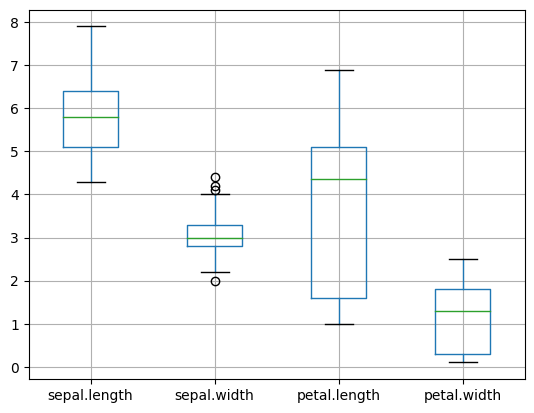

In [ ]:


'''
   **Diccionario de Datos dataset Iris**
El dataset releva las caracteristicas presentes en diferentes variadades o especie de la flor iris.

*   Sepal.Length (Largo del Sépalo en cm) : Variable cuantitativa continua.
*   Sepal.Width (Ancho del Sépalo en cm) : Variable cuantitativa continua.
*   Petal.Length (Largo del Pétalo en cm): Variable cuantitativa continua.
*   Petal.Width (Ancho del Pétalo en cm) : Variable cuantitativa continua.
*   Variety (Variedad de flor iris en cm) : Variable cualitativa categórica nominal.

Sepal.length , Sepal.Width . Petal.length y petal.width son variables cuantittaivas dado que deben contener numeros que además son continuos.
Variety: expresa la variedad de la flor, siendo una categoria.
'''


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ChernoffFace import *

import matplotlib.cm

#Deteccion de valores outliers por columna

def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


# Enlace directo al archivo CSV de Iris en GitHub
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

# Cargamos el dataset de Iris en un DataFrame
iris_data = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print(iris_data.head())
iris_data.isnull()

#Inspeccionamos el dataset para deteccion valores nulos (faltantes)
iris_data.info()
print(iris_data.shape)



#No se detectan valores nulos en el dataset y en primera instancia ahora buscamos posibles outliers (valores atipicos)
#Obtenemos medidas de estadistida descriptiva
print(iris_data.describe())

#Hacemos el grafico boxplot de las variables
iris_data.columns
iris_data.boxplot()

#Se detectan  outliers en sepal.wdith

# Llamamos a la función para eliminar datos para cada columna numérica donde desees detectar outliers
columns_to_check = ["sepal.width"]
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(iris_data, col)
    outliers_list.append(outliers)

# Concatenamos todos los outliers encontrados en un solo DataFrame
outliers_iris = pd.concat(outliers_list)

#Mostramos todos los outliers detectados
print(outliers_list)

# Eliminamos los outliers del conjunto de datos original
data_cleaned = iris_data.drop(outliers_iris.index)

# Imprimimos la cantidad de outliers detectados
print("Número de outliers detectados:", len(outliers_iris))




(146, 5)


<Axes: >

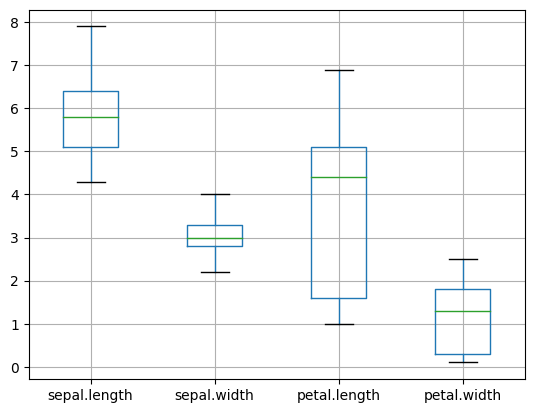

In [ ]:
#Graficamos nuevamente por boxplot con el dataset ya limpio
print(data_cleaned.shape)
data_cleaned.columns
data_cleaned.boxplot()

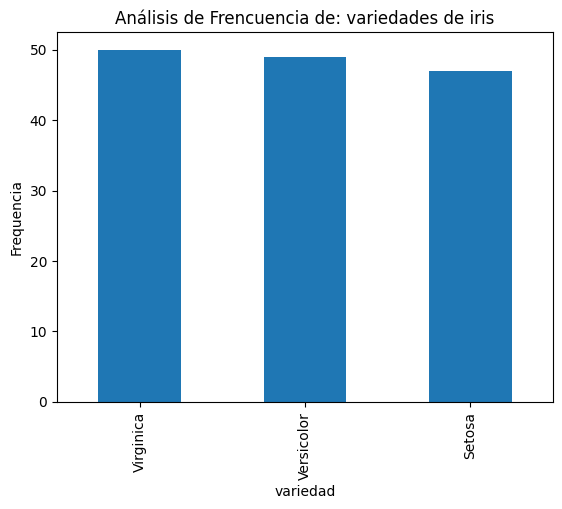

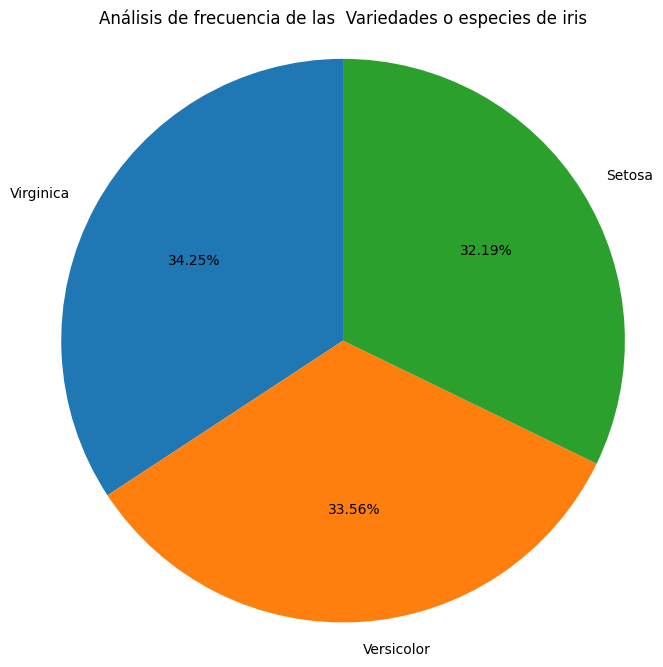

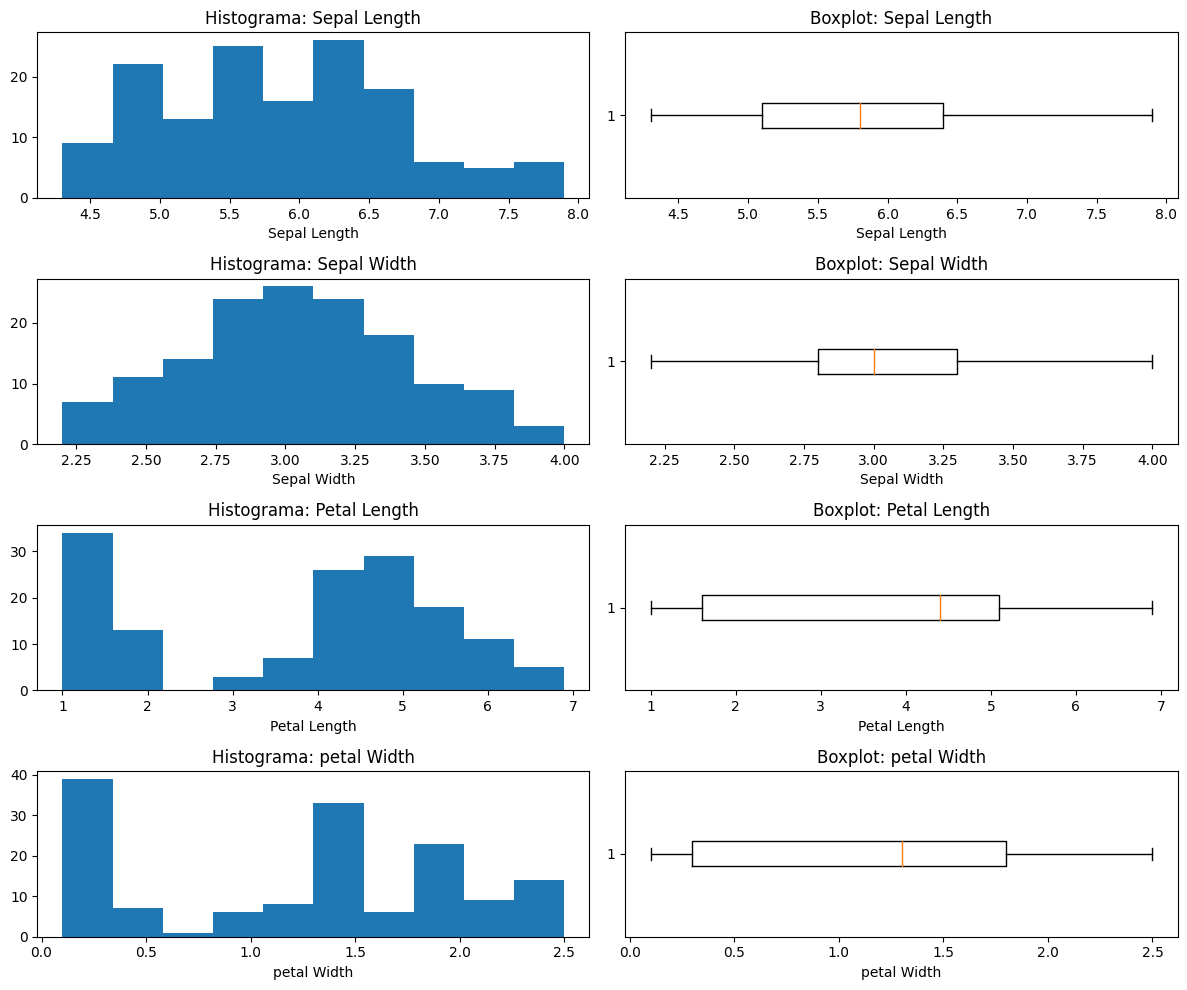

In [ ]:


#Raalizamos graficas para analisis univariado
#Grafica barras (variedades)

data_cleaned['variety'].value_counts().plot(kind='bar')
plt.xlabel('variedad')
plt.ylabel('Frequencia')
plt.title('Análisis de Frencuencia de: variedades de iris')
plt.show()


#Diagrama de torta
labels = data_cleaned['variety'].value_counts().index
counts = data_cleaned['variety'].value_counts().values

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))


plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Esto asegura que el gráfico de torta sea un círculo en lugar de una elipse
plt.title('Análisis de frecuencia de las  Variedades o especies de iris')
plt.show()


#Histogramas y box plot extra

fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# Trazamos el histograma y el boxplot para "Sepal Length"
axs[0, 0].hist(data_cleaned['sepal.length'])
axs[0, 0].set_xlabel('Sepal Length')
axs[0, 0].set_title('Histograma: Sepal Length')

axs[0, 1].boxplot(data_cleaned['sepal.length'],vert=False)
axs[0, 1].set_xlabel('Sepal Length')
axs[0, 1].set_title('Boxplot: Sepal Length')

# Trazamos el histograma y el boxplot para "Sepal Width"
axs[1, 0].hist(data_cleaned['sepal.width'])
axs[1, 0].set_xlabel('Sepal Width')
axs[1, 0].set_title('Histograma: Sepal Width')

axs[1, 1].boxplot(data_cleaned['sepal.width'],vert=False)
axs[1, 1].set_xlabel('Sepal Width')
axs[1, 1].set_title('Boxplot: Sepal Width')


# Trazamos el histograma y el boxplot para "Petal Length"
axs[2, 0].hist(data_cleaned['petal.length'])
axs[2, 0].set_xlabel('Petal Length')
axs[2, 0].set_title('Histograma: Petal Length')

axs[2, 1].boxplot(data_cleaned['petal.length'],vert=False)
axs[2, 1].set_xlabel('Petal Length')
axs[2, 1].set_title('Boxplot: Petal Length')

# Trazar el histograma y el boxplot para "Sepal Width"
axs[3, 0].hist(data_cleaned['petal.width'])
axs[3, 0].set_xlabel('petal Width')
axs[3, 0].set_title('Histograma: petal Width')

axs[3, 1].boxplot(data_cleaned['petal.width'],vert=False)
axs[3, 1].set_xlabel('petal Width')
axs[3, 1].set_title('Boxplot: petal Width')

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()



#Conclusiones de las graficas de analisis univariado

#La variedad o especie de iris mas encontrada es la Virginica (50 ejemplares) , seguida seucesivamente de la Versicolor y la Setosa
#La variedad Virginica constituye el 34,25 % de la especies, la Versicolor el 33,56 % y la Setosa el 32,19 %
#El largo del sepalo presenta valores que siguen una distribucion normal de los datos, la dispersión de los datos
# es mayor que para el ancho del sepalo y menor a las otras variables.El 50  % de los datos esta entre valor 5.5 y 6.5.
#El ancho del sepalo presenta una distribucion de datos con ligera desviacion hacia la izquierda (negativa) y poca variablidad
#de los datos respecto a la media.El 50 % ciento de los datos esta entre 2.75 y 3,25 aproximadamente.
#El largo del petalo presenta una gran variabilidad de los datos respecto al valor central y presenta una
#distribucion de datos asimetrica a la derrecha.El 50 % de los datos esta entre 2 y 5
#El ancho del petalo presenta bastante variabilidad de los datos respecto del valor central, y la distribucion de los datos
#es asimetrica a la derecha.el 50 % de los datos esta entre 0.2 y 1.8 aproximadamente.




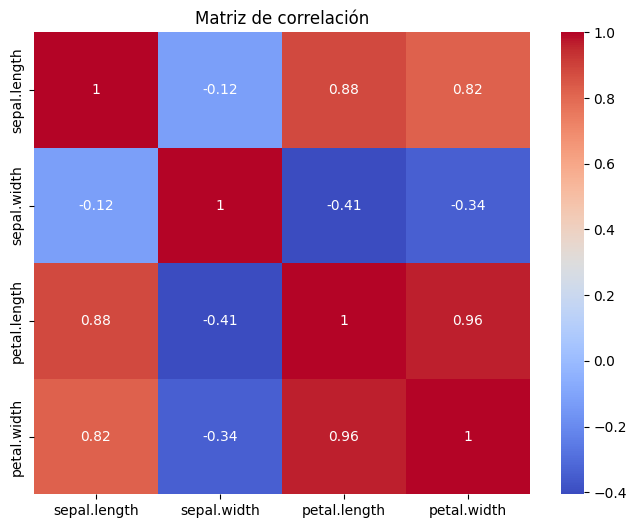

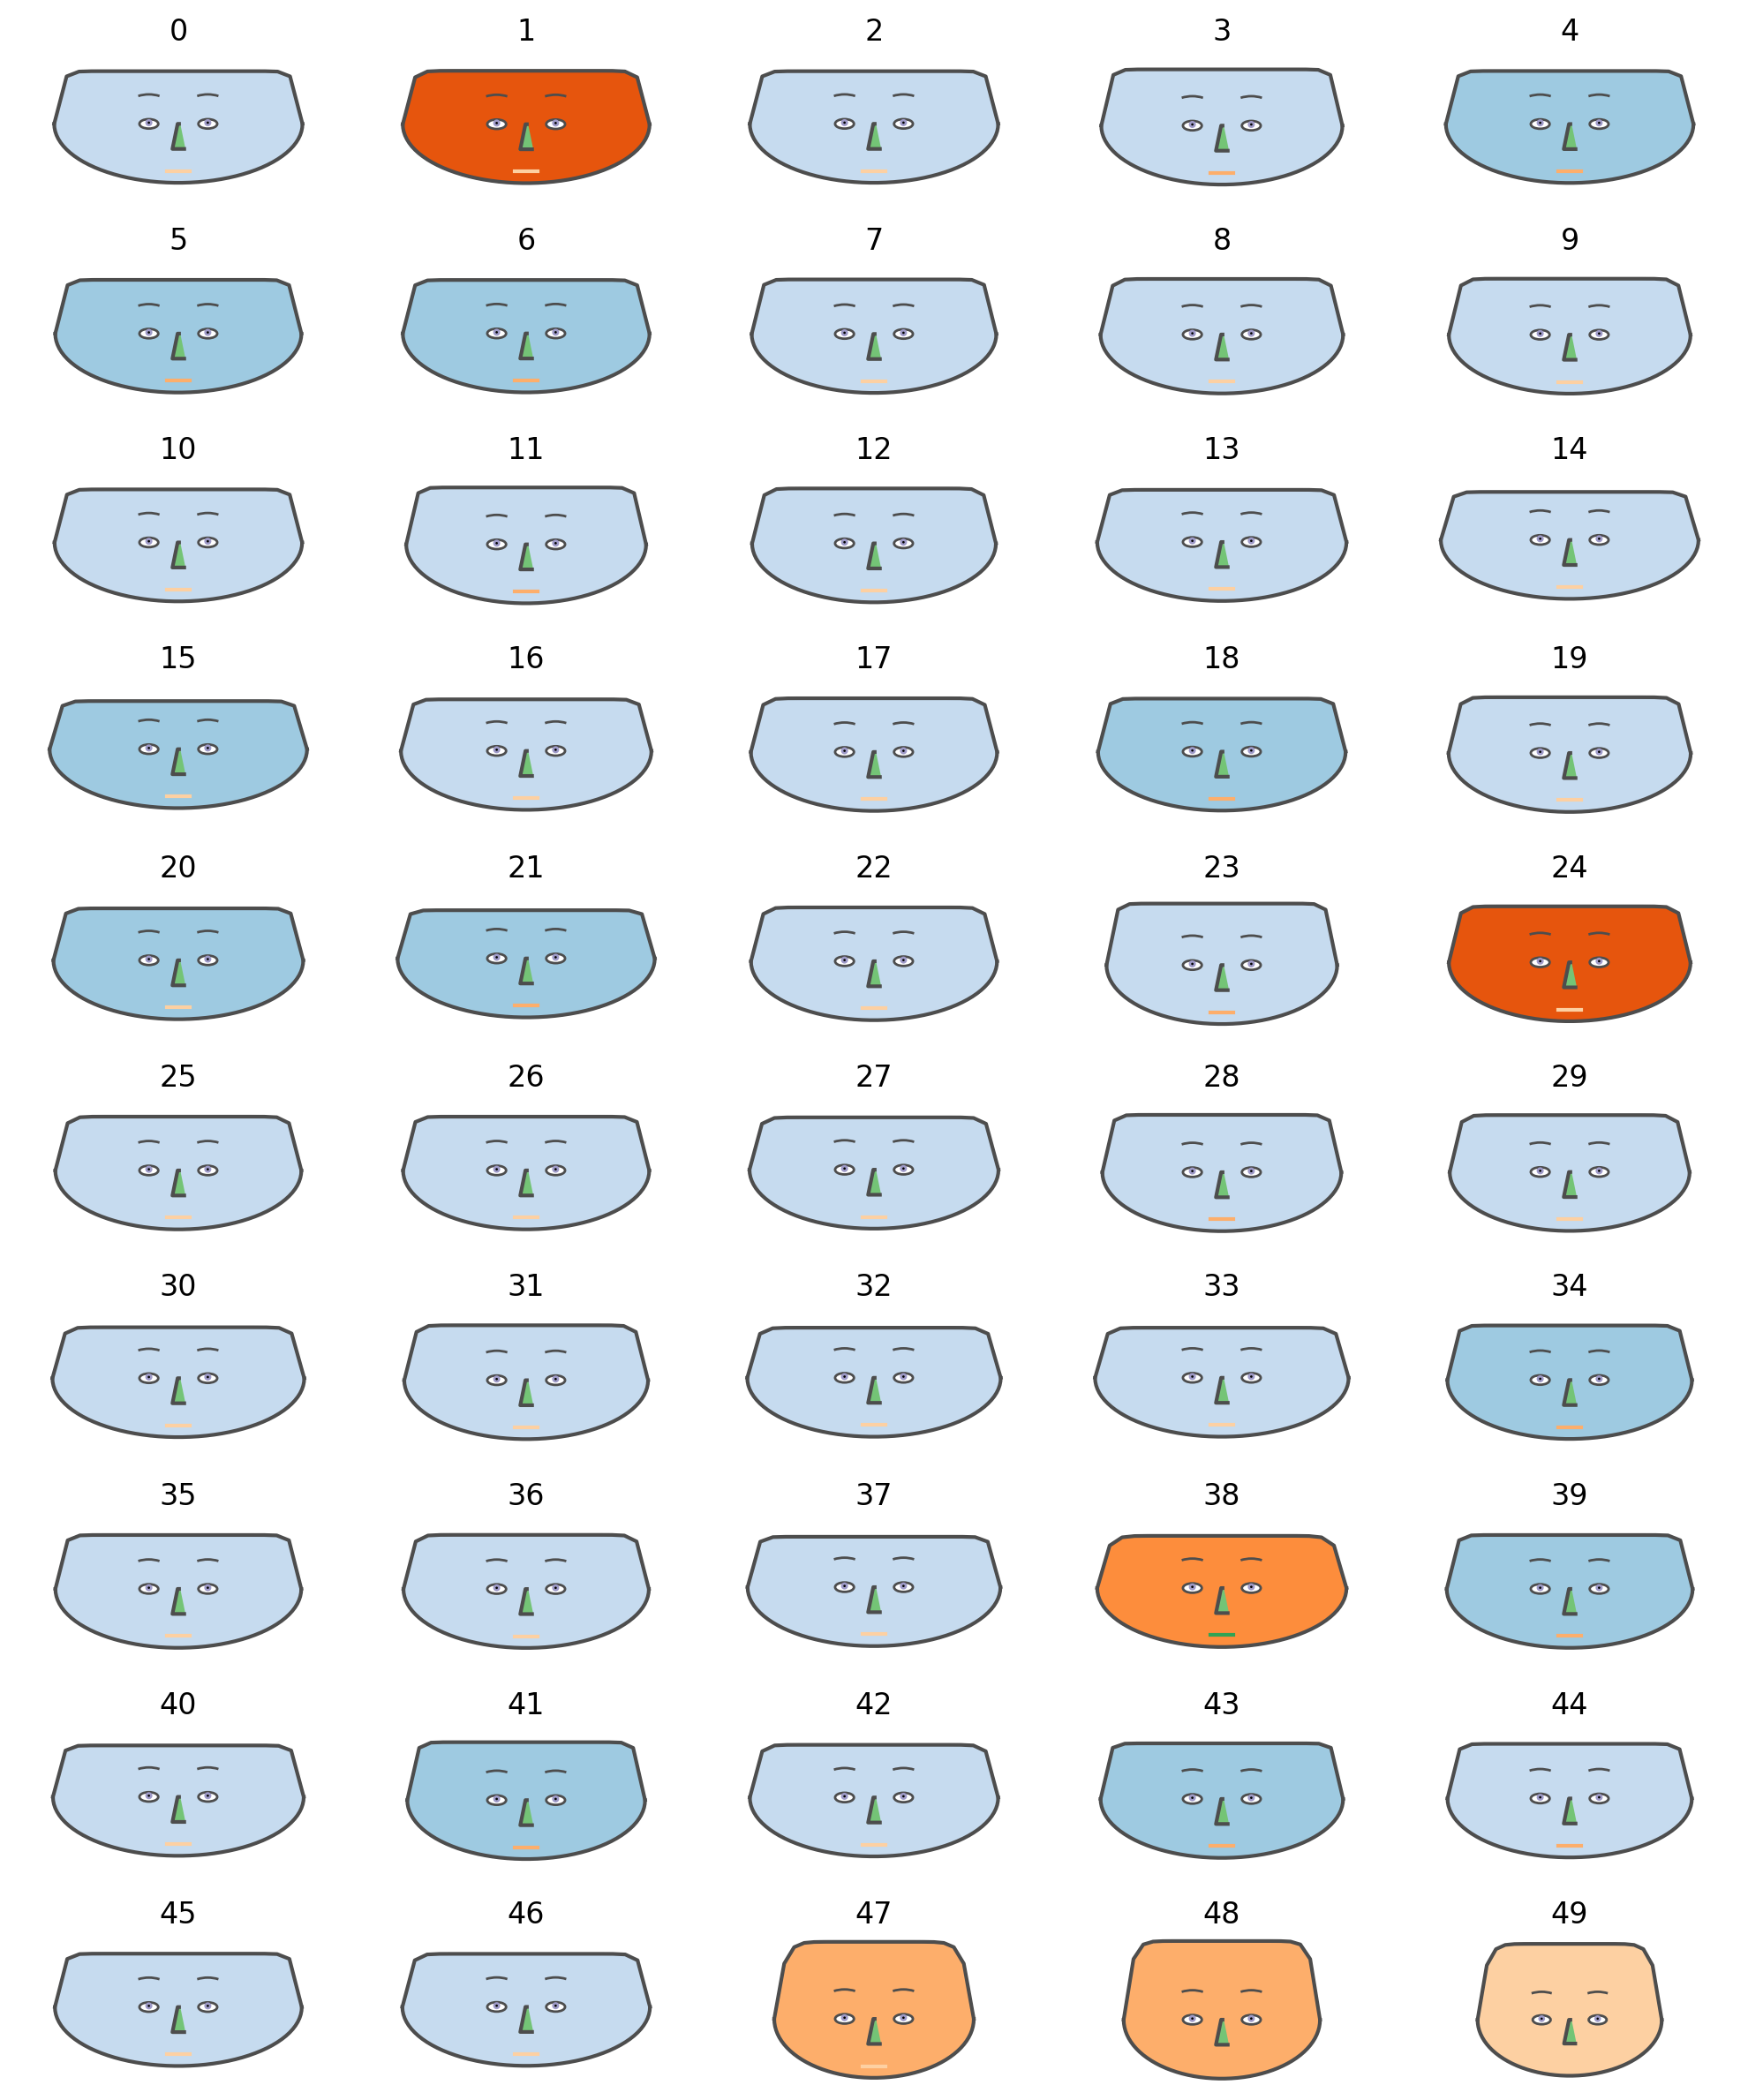

'Previamente habiamos detectado y eliminado todos los valores outliers (encontrados en\nla variable sepal.width) con lo que en este grarfico de cadas de Chernoff no detectamos valores outliers'

In [ ]:
#Hacemos la matriz de correlacion

correlation_matrix = data_cleaned[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].corr()
plt.figure(figsize=(8, 6))

#Visualizamos la matriz de correlacion en un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#Explicacion variables correlacionadas en la matriz de correlacion

''' Encontramos una alta correlacion positiva (0.95) entre el ancho del petalo (petal.width) y el largo del petalo (petal.length)
como asi tambien el mismo tipo de correlacion (valor 0.88) entre el largo del petalo (petal.length) y el largo del sepalo (sepal.length)
y en menor medida (0.82) entre el largo del sepalo y el ancho del petalo
La matriz de correlacion tambien evidencia correlaciones negativas por ejemplo entre el ancho del sepalo y el ancho del sepalo,
siendo mas evidente (valor -0.41) entre el largo del
petalo y el ancho de sepalo
Existe una leve correlacion negativa (valor -0.12) entre el ancho de sepalo y el largo del sepalo
'''

#Efectuamos el grafico de Chernoff
#Tomamos algunos datos del dataset
#aca falta consultar poque si es por derectar otuliers capaz debe llamarse al dataset original y no al limpiado

subdata = data_cleaned.iloc[:50]

#fig =chernoff_face(subdata, long_face=True, color_mapper=matplotlib.cm.tab20c_r,figsize=(12,12), dpi=200)
fig = chernoff_face(data=subdata,titles=[str(x) for x in list(range(len(subdata)))],
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(10, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

#Analisis sobre el grafico de Chernoff
'''Previamente habiamos detectado y eliminado todos los valores outliers (encontrados en
la variable sepal.width) con lo que en este grarfico de cadas de Chernoff no detectamos valores outliers'''


#Wine

In [ ]:
#Realizar puntos del TP

#  Indian Diabetes

In [ ]:
!pip install ChernoffFace

Diccionario de datos

Este conjunto de datos procede del Instituto Nacional de Diabetes Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes,
basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos.

Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia.

En concreto, todos los pacientes son mujeres de al menos 21 años y de ascendencia india.
Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo,
el resultado.
Las variables predictoras incluyen el número de embarazos que ha tenido la paciente,
su IMC, su nivel de insulina, su edad, etcétera.

* Pregnancies (Embarazos): Cuántos embarazos ha tenido la paciente.
* Glucose (Glucosa): Concentracion de glucosa en plasma a 2 horas de haber comido.
* Blood Presure (Presión Sanguínea): Presion sanguinea diastólica (mm de Hg).
* Skin Thickness(Grosor de la Piel): Qué tan gruesa es la piel en un pliegue del triceps.(en milimetros)
* Insulin(Insulina): Insulina en suero en 2 horas-
* BMI (Índice de Masa Corporal): Indice de masa corporal(peso en kilogramos/peso en metros cuadrados).
* Diabetes Pedigree Function (Función de Pedigrí de Diabetes): Una estimación de la probabilidad de tener diabetes por herencia familiar.
* Age (Edad): Cuántos años tiene la paciente.
* Ouutcome (Resultado) : Si la paciente tiene diabetes es (1) o no (0).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ChernoffFace import *
import matplotlib.cm
import itertools

Cargamos el data set mediante github

In [ ]:
# Enlace directo al archivo CSV de Diabetes en GitHub
url = 'https://gist.githubusercontent.com/paingolani/5afba29739da5cfdb70879b8775351df/raw/b0c2ce9580bb74e2b7499d21d8fb8bea8b62373c/gistfile1.txt'
# Cargar el dataset de Diabetes en un DataFrame
diabetes_ds = pd.read_csv(url)
# Mostrar las primeras filas del DataFrame
diabetes_ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Informacion Basica del data set
diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Columnas del dataset
diabetes_ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

















Tipo de varables:

1.   Pregnancies = Cuantitativa discreta, cantidad de embarazos.
2.   Glucose =  cuantitativa continua, concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa.
3.   BloodPressure = Cuantitativa continua, Presión arterial diastólica (mm Hg).
4.   SkingThickness = Cuantitativa continua, Grosor del pliegue cutáneo del tríceps (mm).
5.   Insulin = Cuantitativa continua, Insulina sérica de 2 horas (mu U/ml).
6.   Bmi = Cuantitativa continua, Índice de masa corporal (peso en kg/(altura en m)^2).
7.   DiabetesPedifreeFunction = Cuantitativa continua, Función de pedigrí de diabetes.
8.   Age = Cuantitativa discreta, Edad.
9.   Outcome = Categorica , Variable de clase (0 o 1) 268 de 768 son 1, los demás son 0.

In [ ]:
#Buscamos datos nulos
diabetes_ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Datos basicos estadisticos del data set
diabetes_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


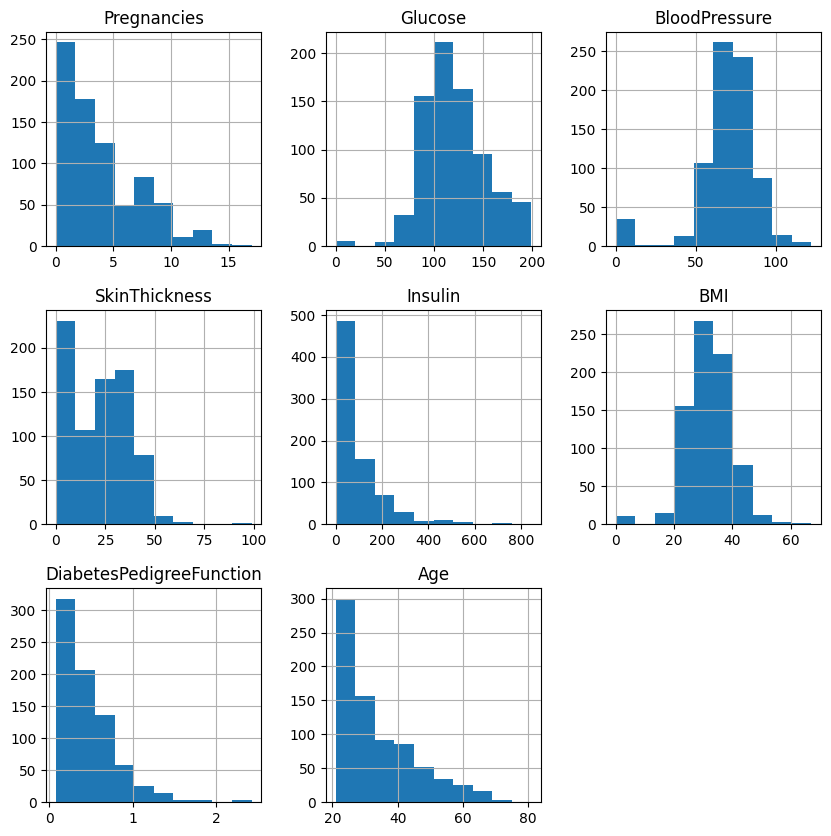

In [ ]:
#Histograma de como se distribuyen los datos en cada columna
copia_diabetes_noOut=diabetes_ds.drop('Outcome', axis=1)
copia_diabetes_noOut.hist(figsize=(10,10))
plt.show()

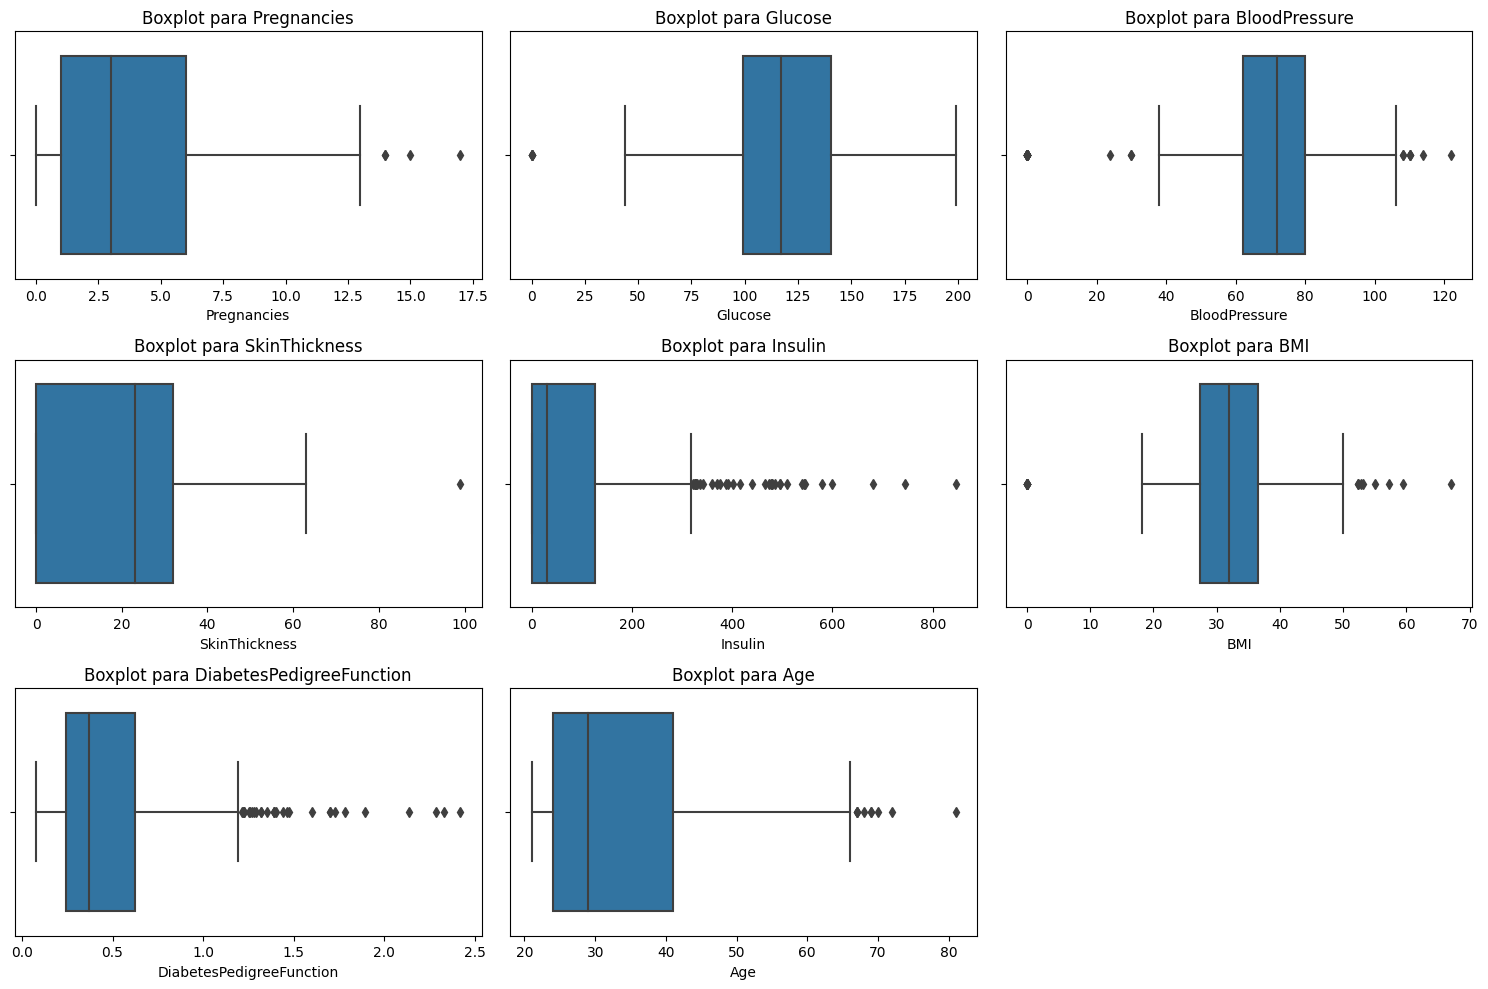

In [ ]:
#Boxplot
num_rows, num_cols = 3, 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(copia_diabetes_noOut.columns):
    sns.boxplot(data=copia_diabetes_noOut, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot para {column}')

# Remove any remaining empty subplots
for j in range(len(copia_diabetes_noOut.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Valores Atipicos y outliers:

* Se detectan valores con 0 en varias columnas lo cual deberia ser erroneo, pero analizamos una por una
1. (Pregnancies) Embarazos, es normal que tenga 0 ya que indica que  nunca estuvo embarazada.

2. (Glucose) Glucosa, tener 0 de glucosa en sangre es extremadamente como ademas peligroso lo cual podria indicar un problema grave de salud como asi llevar a una afección llamada hipoglucemia severa, pero sigue siendo posible.

3. (BloodPressure) Presion sanguinea, tener 0 aca indicaria que no hay presion en la sangre o que el individuo esta en condicion fatal, lo cual podria indicar que no se midio y se remplazo el valor nulo con 0

4. (Insulin) Insulina, tener 0 de insulina es extremadamente peligroso ya que llevaria a un aumento de glucosa en la sangre a niveles de riesgo, pero el dato puede llegar a ser 0 o (no ser suficiente para que sea registrado) ya que por ejemplo en la diabetes tipo 1 el cuerpo deja de generar insulina.

5. (Skin Thickness) Grosor de la piel, tener 0 en el grosor de la piel es altamente improbable por lo que indicaria los individuos que tenian 0 no se les midio.

6. (Bmi) Indice de masa corporal, este valor es imposible que de 0 ya que la unica forma de que de ese valor es que el peso del individuo sea 0, por lo cual el valor 0 es un error.

In [ ]:
#SkinTickness al tener tantos datos erroneos lo mejor es eliminar la columna para no sesgar el analisis
copia_diabetes_ds = diabetes_ds.copy(deep = True)
copia_diabetes_ds = copia_diabetes_ds.drop('SkinThickness', axis=1)
copia_diabetes_ds.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [ ]:
#Vamos a remplazar los ceros con NaN
copia_diabetes_ds[['Glucose','BloodPressure','BMI']] = copia_diabetes_ds[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)
print(copia_diabetes_ds.isnull().sum())

Pregnancies                  0
Glucose                      5
BloodPressure               35
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

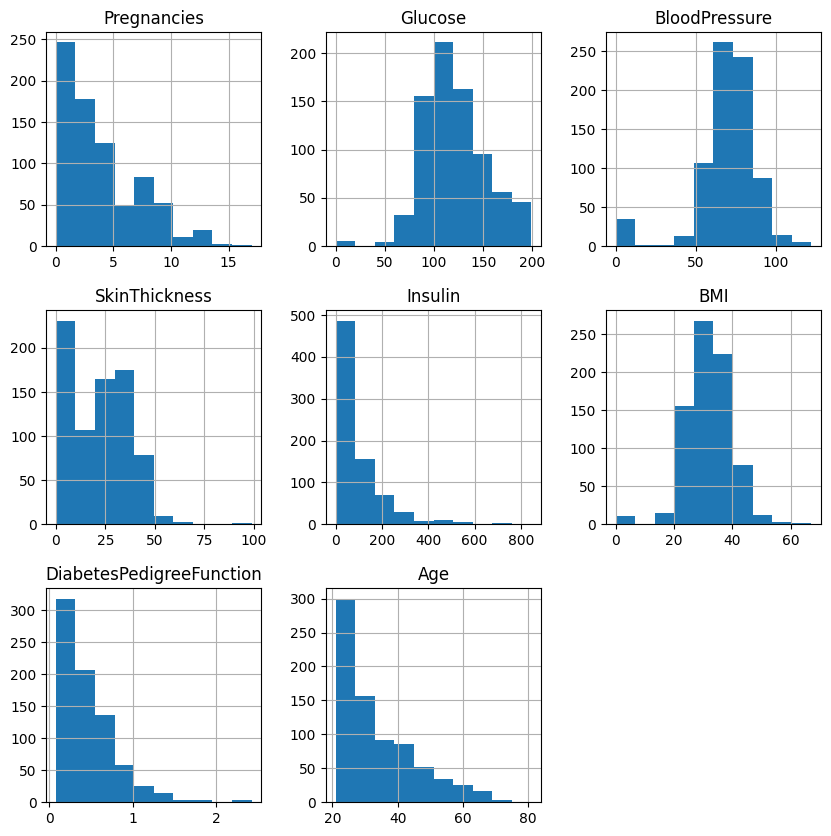

In [ ]:
#Imprimimos el nuevo histograma con los datos remplazados por NaN
copia_diabetes_noOut.hist(figsize=(10,10))

In [ ]:

#Remplazamos los valores nulos con datos de la media o mediana
copia_diabetes_ds['Glucose'].fillna(copia_diabetes_ds['Glucose'].mean(), inplace = True)
copia_diabetes_ds['BloodPressure'].fillna(copia_diabetes_ds['BloodPressure'].mean(), inplace = True)
copia_diabetes_ds['BMI'].fillna(copia_diabetes_ds['BMI'].median(), inplace = True)

#Rutina de deteccion outliers
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    #outliers = data[(data[column] <lower_bound) | (data[column] > upper_bound)]
    outliers = data[(data[column] > upper_bound)| (data[column]< lower_bound) ]
    return outliers

#Aplicamos la deteccionnd e otuliers en las columnas de Insulin,Pressure,BMI
# Llamamos a la función para eliminar datos para cada columna numérica que se quiera detectar outliers


columns_to_check = ['Insulin','BMI','BloodPressure']
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(copia_diabetes_ds, col)
    outliers_list.append(outliers)

# Concatenamos todos los outliers encontrados en un solo DataFrame
outliers_data = pd.concat(outliers_list)
print(outliers_data)

# Eliminamos los outliers del conjunto de datos original
copia_diabetes_ds2=copia_diabetes_ds.drop(outliers_data.index)

# Imprimimos la cantidad de outliers detectados
print("Número de outliers detectados:", len(outliers_data))


     Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
8              2    197.0      70.000000      543  30.5   
13             1    189.0      60.000000      846  30.1   
54             7    150.0      66.000000      342  34.7   
111            8    155.0      62.000000      495  34.0   
139            5    105.0      72.000000      325  36.9   
153            1    153.0      82.000000      485  40.6   
186            8    181.0      68.000000      495  30.1   
220            0    177.0      60.000000      478  34.6   
228            4    197.0      70.000000      744  36.7   
231            6    134.0      80.000000      370  46.2   
247            0    165.0      90.000000      680  52.3   
248            9    124.0      70.000000      402  35.4   
258            1    193.0      50.000000      375  25.9   
286            5    155.0      84.000000      545  38.7   
296            2    146.0      70.000000      360  28.0   
360            5    189.0      64.000000      325  31.2 

<Axes: >

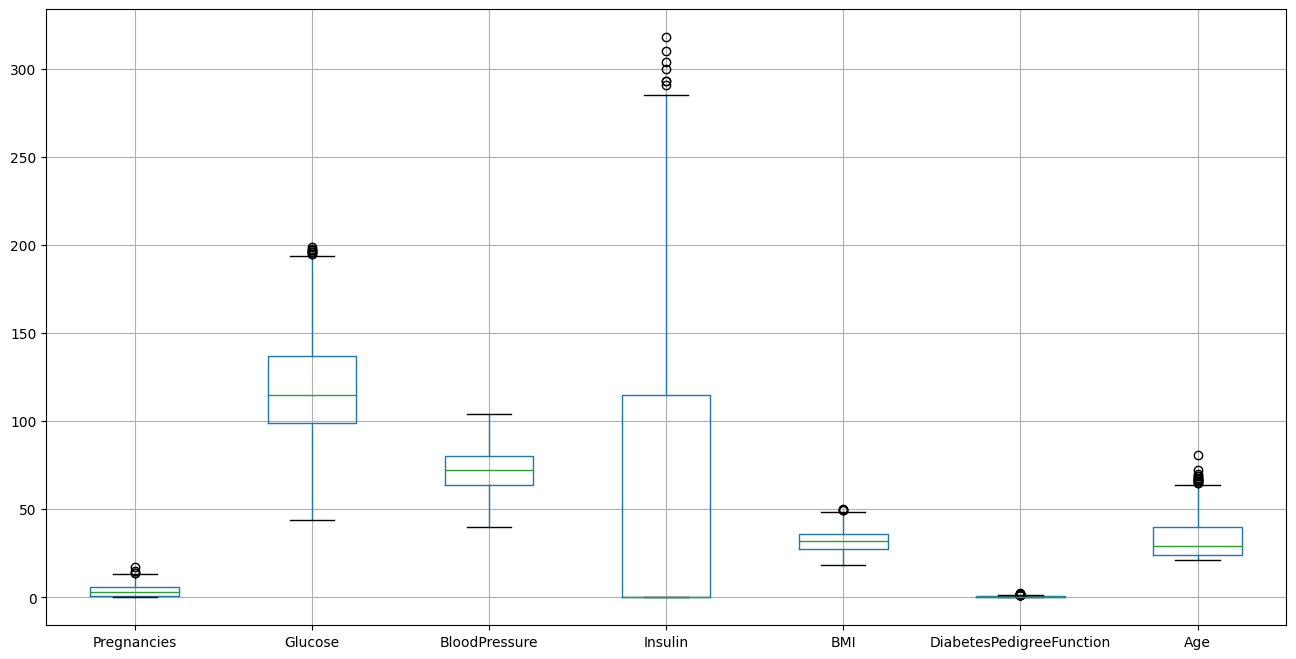

In [ ]:
#Mostramos los boxplot del dataset ya limpio
copia_diabetes_ds2.boxplot(['Pregnancies','Glucose', 'BloodPressure', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age'],figsize=(16,8))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

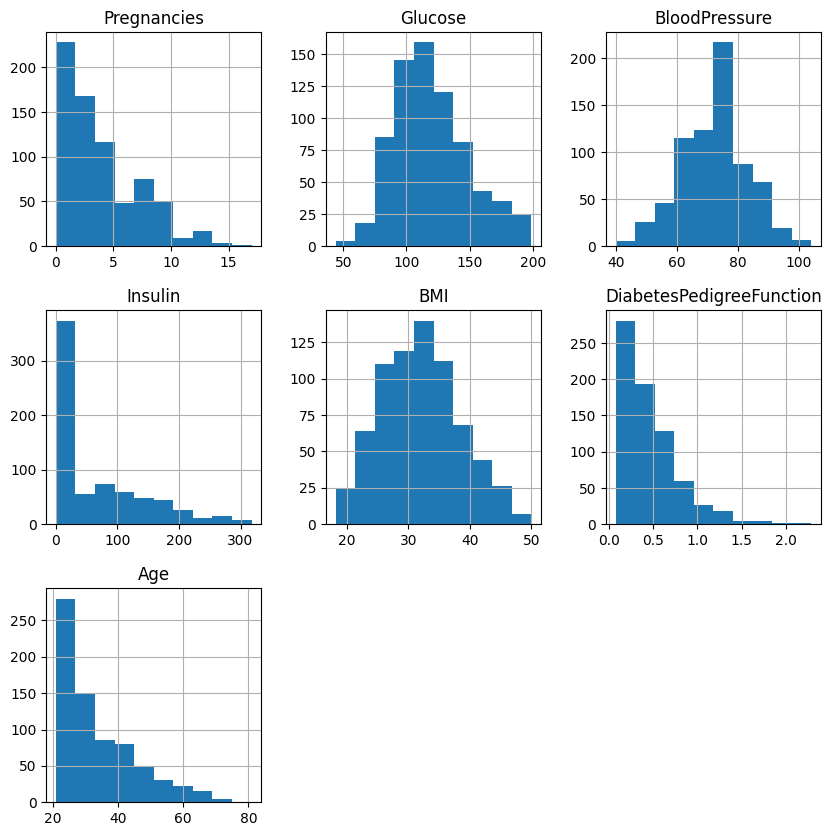

In [ ]:
#Imprimimos el nuevo histograma con los datos NaN remplazados por la media o mediana
copia_diabetes_noOut=copia_diabetes_ds2.drop('Outcome', axis=1)
copia_diabetes_noOut.hist(figsize=(10,10))

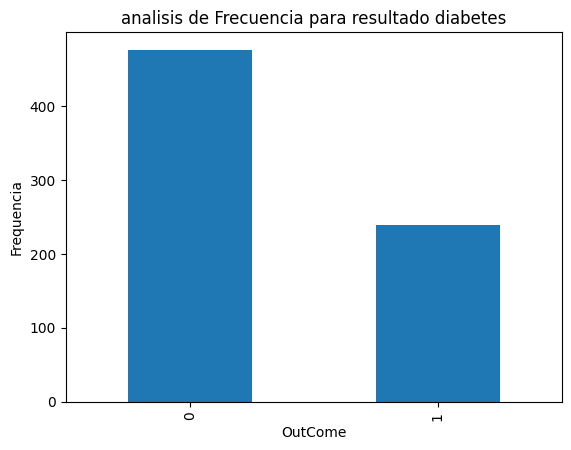

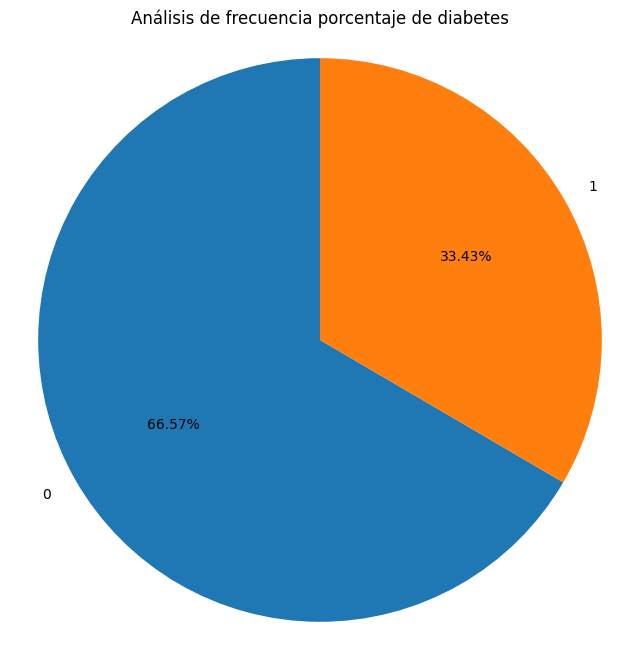

In [ ]:
#Grafica barras (variedades)

copia_diabetes_ds2['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('OutCome')
plt.ylabel('Frequencia')
plt.title('analisis de Frecuencia para resultado diabetes')
plt.show()


#Diagrama de torta
labels = copia_diabetes_ds2['Outcome'].value_counts().index
counts = copia_diabetes_ds2['Outcome'].value_counts().values

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))


plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal')  # Esto asegura que el gráfico de torta sea un círculo en lugar de una elipse
plt.title('Análisis de frecuencia porcentaje de diabetes')
plt.show()

7) Observaciones del análisis de los graficos univariados (incluidos los boxplots):

* Pregnancies: La frecuencia de embarazos sigue una distribucion  asimetrica hacia la derecha, apreciamos que los valores estan mas
concentrados a la derecha del valor central y el 50 % de los datos se encuentra entre 0 y 6 aproximadamente.Hay bastante dispersion de los datos.

* Glucose: siguen una distribucion un poco asimétrica a la derecha , se puede decir que la mayoria de las pacientes tiene un valor de glucosa entre 90 y 120. El 50 por ciento de los datos esta entre 100 y 140.

* BloodPressure: Tiene distribucion normal,  la mayoria de las pacientes tiene un valor de presion arterial diastólica entre 60 y 80. El 50 por ciento de los datos esta entre 70 y 80.

* Insulin: Asimetria positiva.La mayoria de las pacientes tiene un valor de insulina entre 0 y 120 . El 50 por ciento de los datos esta entre 100 y 140

* BMI: Asimetria positiva.La mayoria de las pacientes tiene un IMC con valores entre 25 y 35 aproximadamente.El 50 % de datos
esta entre 27 (aprox) y 36.

* DiabetesPedigreeFunction:resenta una distribucion asimétrica a derecha .El 50 % de datos se da entre valores 0.2 a 0.6.

* Age : presenta una distribucion asimétrica hacia la derecha.Mayoria de
pacientes tienen entre 21 y 30 años.

* Outcome: Un 66,57% delas pacientes no tiene diabetes, y quienes la padecen constituyen el 33.43% .Menos de la mitad de las pacientes padece diabetes.  



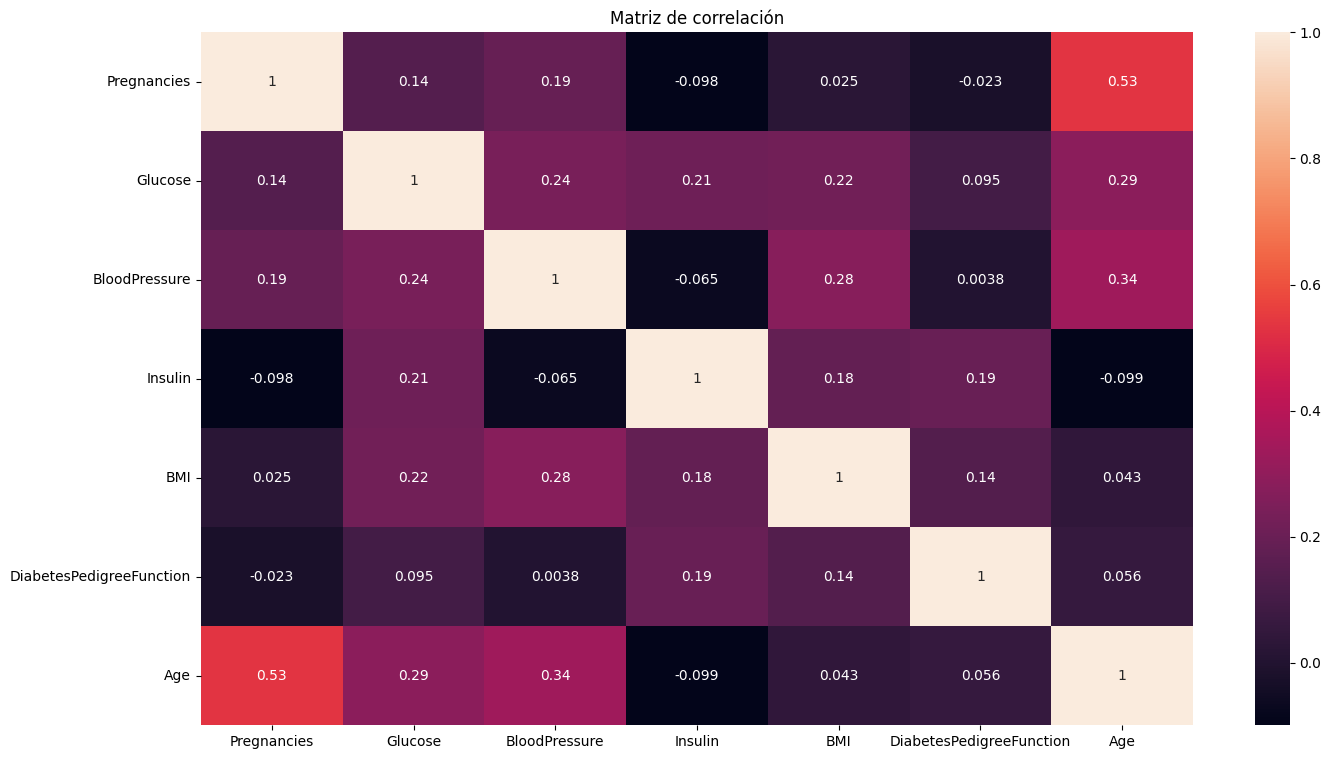

In [ ]:
#Creamos la matriz de correlacion y la visualizamos en un heat map
plt.figure(figsize=(16,9))

matriz_correlacion=copia_diabetes_ds2[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']].corr()
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Matriz de correlación')
plt.show()
print("")

8) Matriz de correlación

Explicacion matriz de correlación y algunas conclusiones :

Podemos observar una correlacion positiva (0.53) entre la edad de la pacientey la cantidad de embarazos , la edad y la presion Arterial (0.34),el IMC (BMI) y la presion arterial (0.28), luego existe correlación positiva entre la edad y la glucosa (0.29),en menor medida hay  correlacion positiva de  (0.21) entre la insulina medida y la cantidad de glucosa en sangre  y entre glucosa y presion arterial (0.24).El resto de relaciones presentan menores correlaciones , y hay escasa correlacion negativa.

Aclaramos que estamos estudiando los datos  sin discriminar entre pacientes con diabetes (33,43%) y sin diabetes (poco mas del 67,57%),
puede haber mayor influencia de los datos de pacientes negativos, no obstante de acuerdo a la matriz de correlacion y los conceptos de diabetes y su relacion con variables explicitados al inicio del estiudio podriamos inferir que:

-A mayor edad la paciente probablemente cursó mas embarazos y por ende este expuesta a un mayor riesgo de padecer diabetes tipo 1 gestacional (con riesgo posterior agregado a sufrir diabetes de tipo 2).

-Al ser la obesidad (se relaciona con el IMC) la causa principal de la diabetes tipo 2 (el tipo mas frecuente) las pacientes embarazadas
o que cursaron  podrian sufrir mayor  riesgo de padecer la enfermedad.

-Si bien no tendria que ver directamente con la diabetes ,la obesidad correlaciona levemente con la presion arterial.La presion arterial tambien presenta cierta correlacion con la glucosa en sangre y esta última tiene una cierta correlacion con la insulina medida.Tanto la glucosa en sangre como la insulina medida tiene que ver con padecer o no la enfermedad.

-La edad se puede tomar tambien factor de riesgo a padecer la enfermedad dada su correlacion positiva con la glucosa en sangre.


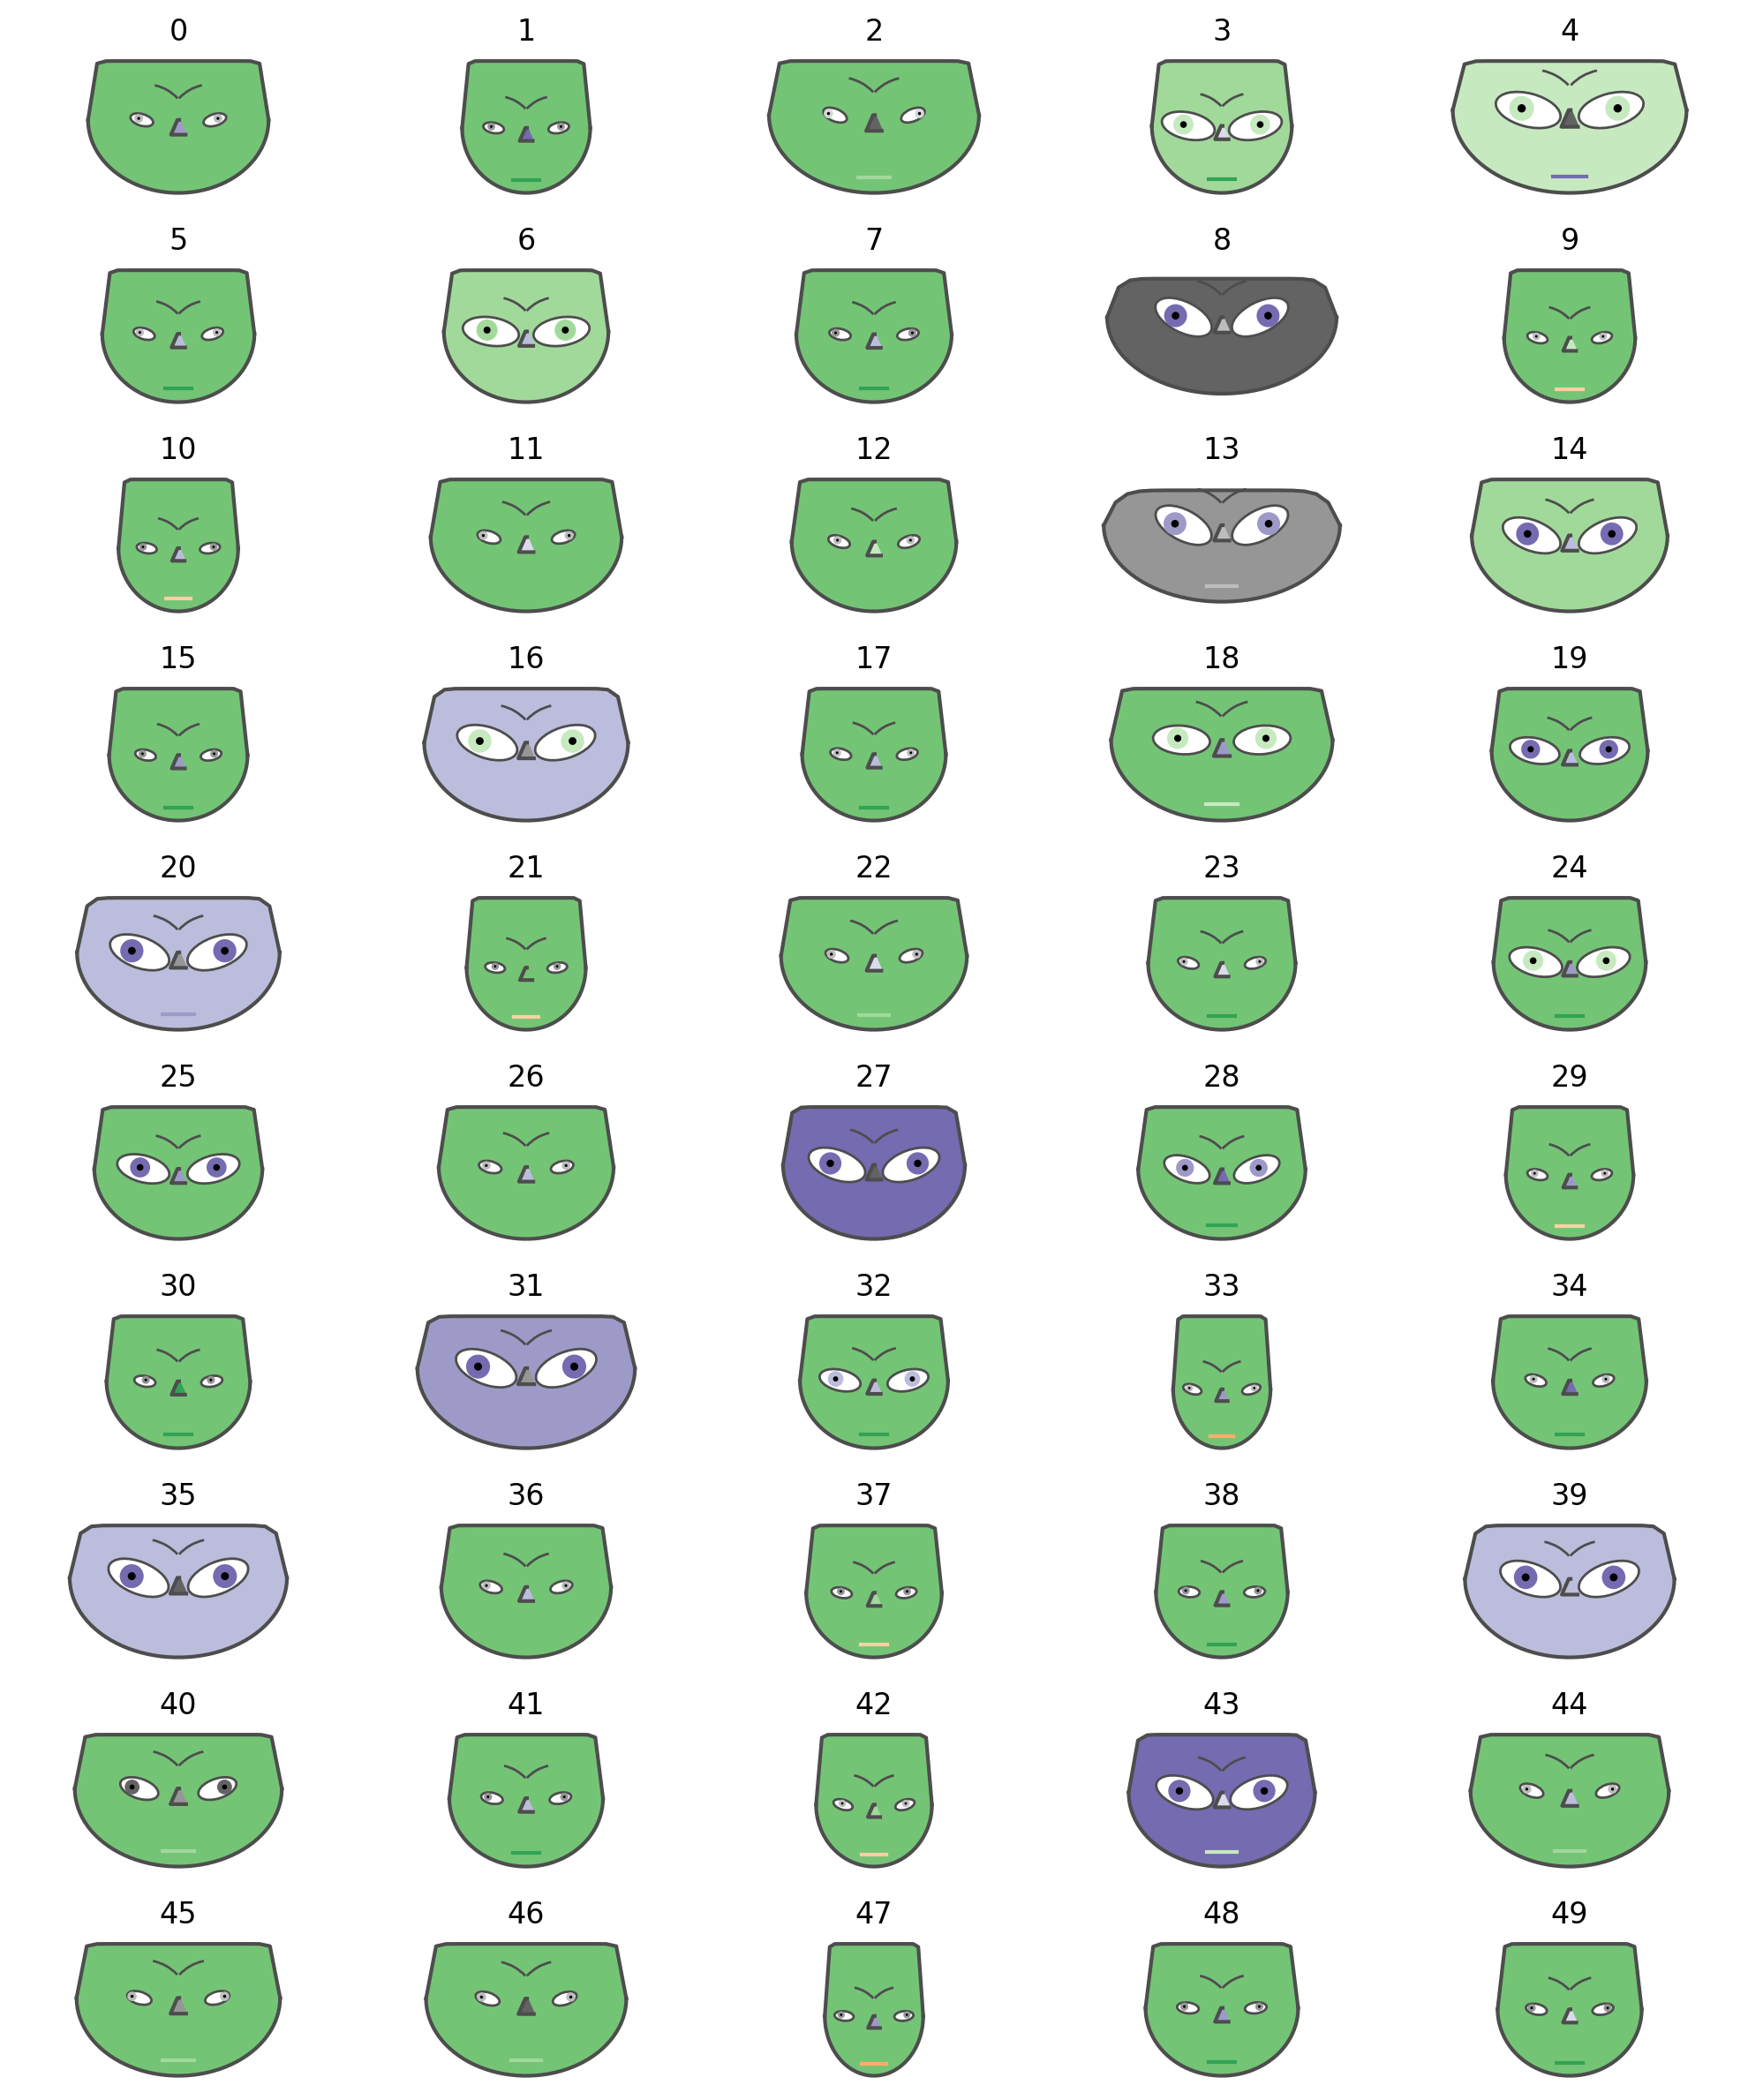

'Previamente habiamos detectado y eliminado todos los valores outliers \n con lo que en este gráfico de cadas de Chernoff no detectamos valores outliers, si valores atipicos leves\n por ejemplo en la vaariable insulin'

In [ ]:
#Grafico de chernoff
subdata=copia_diabetes_ds.iloc[:50]
fig = chernoff_face(data=subdata,titles=[str(x) for x in list(range(len(subdata)))],
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(10, 12), dpi=200)
fig.tight_layout()
matplotlib.pyplot.show()

#Analisis sobre el grafico de Chernoff
'''Previamente habiamos detectado y eliminado todos los valores outliers
 con lo que en este gráfico de cadas de Chernoff no detectamos valores outliers, si valores atipicos leves
 por ejemplo en la vaariable insulin'''